<a href="https://colab.research.google.com/github/VCornejo10/Tarea_Zoo_Clustering/blob/main/Tarea_Zoo_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Jerárquico en el Dataset Zoo
Este notebook es una base para la tarea de clustering jerárquico usando el dataset Zoo.

In [1]:
# Paso 1: Cargar el dataset desde UCI Machine Learning Repository
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
column_names = [
    "animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic",
    "predator", "toothed", "backbone", "breathes", "venomous", "fins",
    "legs", "tail", "domestic", "catsize", "class_type"
]

df = pd.read_csv(url, names=column_names)

# Vista previa
df.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [2]:
# Paso 2: Preprocesamiento (Eliminamos columnas y escalamos datos)
from sklearn.preprocessing import StandardScaler

# Eliminamos columnas no necesarias para el clustering
df_clustering = df.drop(columns=["animal_name", "class_type"])

# Escalamiento de datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Mostrar los primeros datos escalados
import numpy as np
pd.DataFrame(np.round(df_scaled[:5], 2), columns=df_clustering.columns)


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.16,-0.5,-1.19,1.21,-0.56,-0.74,0.90,0.81,0.47,0.51,-0.29,-0.45,0.57,-1.70,-0.38,1.14
1,1.16,-0.5,-1.19,1.21,-0.56,-0.74,-1.12,0.81,0.47,0.51,-0.29,-0.45,0.57,0.59,-0.38,1.14
2,-0.86,-0.5,0.84,-0.83,-0.56,1.34,0.90,0.81,0.47,-1.95,-0.29,2.22,-1.40,0.59,-0.38,-0.88
3,1.16,-0.5,-1.19,1.21,-0.56,-0.74,0.90,0.81,0.47,0.51,-0.29,-0.45,0.57,-1.70,-0.38,1.14
4,1.16,-0.5,-1.19,1.21,-0.56,-0.74,0.90,0.81,0.47,0.51,-0.29,-0.45,0.57,0.59,-0.38,1.14


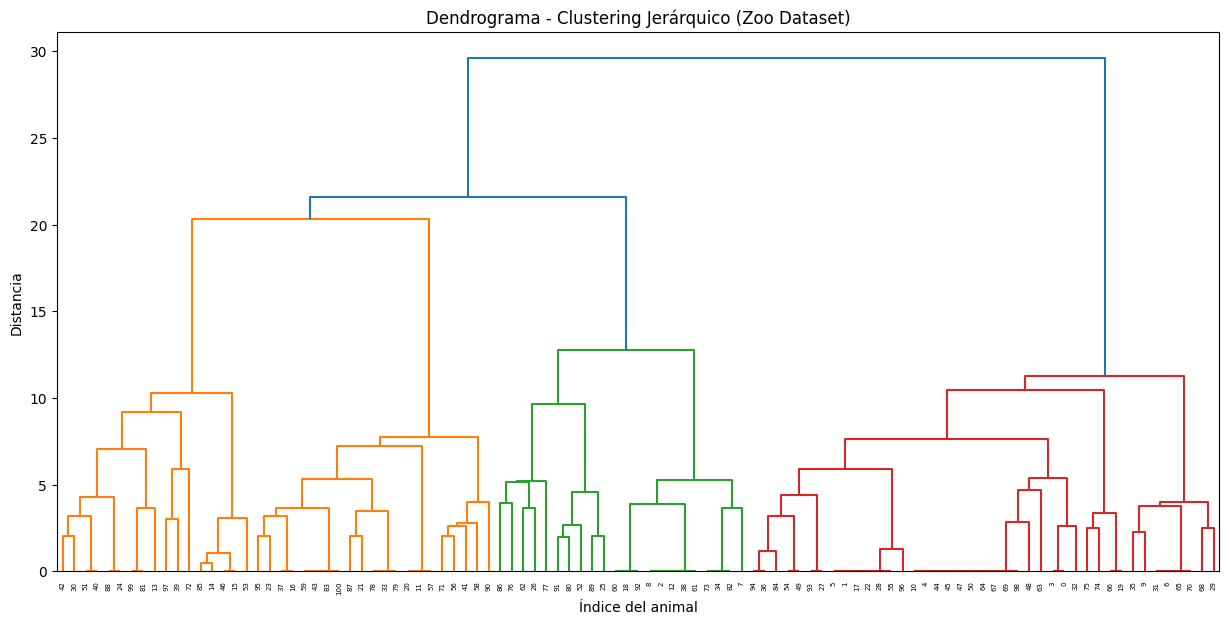

In [3]:
# Paso 3: Clustering Jerárquico y Dendrograma
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Enlace jerárquico con método Ward
linked = linkage(df_scaled, method='ward')

# Dendrograma
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Dendrograma - Clustering Jerárquico (Zoo Dataset)")
plt.xlabel("Índice del animal")
plt.ylabel("Distancia")
plt.show()


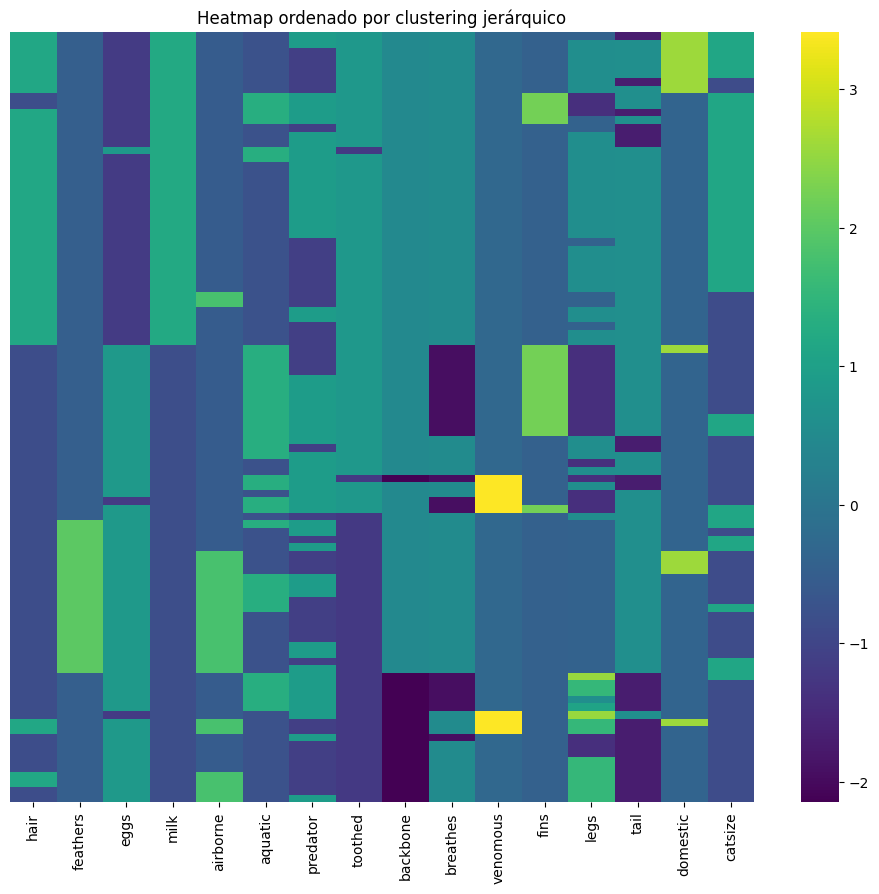

In [4]:
# Paso 4: Heatmap de los datos ordenados por clustering
import seaborn as sns
from scipy.cluster.hierarchy import leaves_list

# Orden de las hojas según el dendrograma
orden = leaves_list(linked)
df_heatmap = pd.DataFrame(df_scaled[orden], columns=df_clustering.columns)

plt.figure(figsize=(12, 10))
sns.heatmap(df_heatmap, cmap="viridis", xticklabels=True, yticklabels=False)
plt.title("Heatmap ordenado por clustering jerárquico")
plt.show()


# Conclusiones
Las agrupaciones reflejan patrones zoológicos claros: los mamíferos se agrupan por tener pelo y producir leche, las aves por tener plumas y volar, etc. El clustering jerárquico logra separar grupos con características similares de forma coherente.


## Pregunta 1
1. ¿Cuántos clusters se pueden identificar claramente en el dendrograma?

Se pueden identificar 6 a 7 clusters visualmente, antes de un gran salto en la distancia de enlace.



## Pregunta 2
2. ¿Qué características parecen determinar la formación de los clusters?

Las más determinantes son:
* Hair
* Feathers
* Milk
* Eggs
* Quatic
* Fins

Estas definen grandes grupos como mamíferos, aves, peces, reptiles, etc.

## Pregunta 3
3. ¿Los resultados del clustering tienen sentido biológico o zoológico?

Sí, se agrupan animales con características fisiológicas y de comportamiento similares, reflejando categorías zoológicas reales.

## Pregunta 4
4. ¿Cómo afecta la normalización de los datos al clustering?

Evita que atributos con valores mayores (como legs) dominen sobre atributos binarios. Así, todas las variables tienen peso similar en el cálculo de distancias.

## Pregunta 5
5. ¿Qué método de linkage utilizaste y por qué?

Usé Ward porque minimiza la varianza dentro de los clusters, produciendo agrupaciones más compactas y balanceadas, ideal con distancia euclídea.

## Pregunta 6
6. ¿Qué otras técnicas de clustering podrías aplicar a este dataset y por qué?

* K-Means: si se conoce el número de clusters.

* DBSCAN: para descubrir clusters de forma arbitraria y detectar outliers.

* Gaussian Mixture Models: útil si se asume distribución probabilística subyacente.